# Setup

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors

import seaborn as sns
sns.set_style('whitegrid')

# Read Data

In [21]:
cols = ["P2O5", "K", "Mg", "pH"]

In [22]:
# read predictions and true data for trainingdata
path = '../../hyperview/random_forest/evaluation'
y_hat_bls = np.load(os.path.join(path, "y_hat_bls_RandomForest_202205021139_nest=82_maxd=5_minsl=50.npy"))
y_hat_rfs = np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205021139_nest=82_maxd=5_minsl=50.npy"))
y_vs = np.load(os.path.join(path, "y_vs_RandomForest_202205021139_nest=82_maxd=5_minsl=50.npy"))

In [23]:
print(f"y_hat_bls shape {y_hat_bls.shape}")
print(f"y_hat_rfs shape {y_hat_rfs.shape}")
print(f"y_vs shape {y_vs.shape}")

y_hat_bls shape (200, 4)
y_hat_rfs shape (200, 4)
y_vs shape (200, 4)


## Plots: Real -vs Prediction

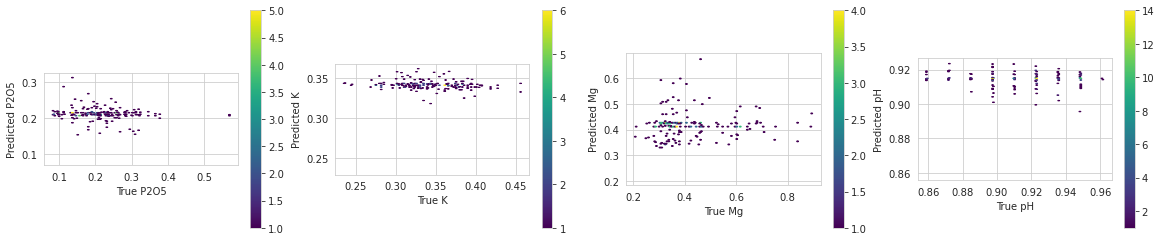

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_rfs[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

## Plots: Real - vs Baseline

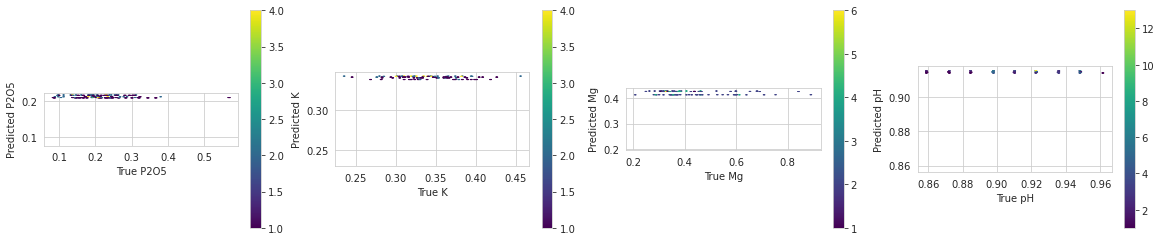

In [28]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_bls[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])